In [1]:
import camelot.io as camelot
import pandas as pd
import seaborn as sb

In [16]:
#This will extract all tables in the pdf

tables=camelot.read_pdf("C:/Users/PC/OneDrive - University of Lagos/Desktop/NEW.pdf", pages="all") #it returns a list of all the tables in the pdf

In [17]:
print(tables) #There are 17 tables in total present in the pdf

<TableList n=17>


In [18]:
for i in range(17):
    table=tables[i]
    print("Table {} has {} shape".format(i+1,table.shape))

Table 1 has (5, 2) shape
Table 2 has (7, 2) shape
Table 3 has (19, 6) shape
Table 4 has (32, 6) shape
Table 5 has (33, 6) shape
Table 6 has (33, 6) shape
Table 7 has (33, 6) shape
Table 8 has (32, 6) shape
Table 9 has (32, 6) shape
Table 10 has (33, 6) shape
Table 11 has (33, 6) shape
Table 12 has (32, 6) shape
Table 13 has (32, 6) shape
Table 14 has (32, 6) shape
Table 15 has (33, 6) shape
Table 16 has (33, 6) shape
Table 17 has (28, 6) shape


In [19]:
#Neglecting the first two tables
lst=[]
for i in range(17):
    if i>1:
        temp=tables[i].df # converting each table to dataFrame
        lst.append(temp)
lst

[               0            1  \
 0   Posted\nDate  Value\nDate   
 1    02-JAN-\n20  01-JAN-\n20   
 2    07-JAN-\n20  07-JAN-\n20   
 3    09-JAN-\n20  09-JAN-\n20   
 4    20-JAN-\n20  18-JAN-\n20   
 5    20-JAN-\n20  18-JAN-\n20   
 6    20-JAN-\n20  19-JAN-\n20   
 7    20-JAN-\n20  20-JAN-\n20   
 8    21-JAN-\n20  21-JAN-\n20   
 9    23-JAN-\n20  23-JAN-\n20   
 10   23-JAN-\n20  23-JAN-\n20   
 11   24-JAN-\n20  24-JAN-\n20   
 12   24-JAN-\n20  24-JAN-\n20   
 13   24-JAN-\n20  24-JAN-\n20   
 14   27-JAN-\n20  27-JAN-\n20   
 15   27-JAN-\n20  25-JAN-\n20   
 16   27-JAN-\n20  26-JAN-\n20   
 17   27-JAN-\n20  26-JAN-\n20   
 18   27-JAN-\n20  26-JAN-\n20   
 
                                                     2          3          4  \
 0                                         Description      Debit     Credit   
 1                        Airtime TopUp: 2348132194503      50.00       ----   
 2   UZOMA JOHN UDUOGU/ONB TRANSFER FROM UZOMA JOHN...       ----   1,000.00  

In [20]:
#Extracting the first table and renaming the first 
lst[0].columns=lst[0].iloc[0,:] # only run them at first iteration then comment out else restart the project
lst[0].drop(0, inplace=True)
lst[0].rename(columns={"Posted\nDate": "Posted Date", "Value\nDate":"Value Date"}, inplace=True)

lst[0].columns

Index(['Posted Date', 'Value Date', 'Description', 'Debit', 'Credit',
       'Balance'],
      dtype='object', name=0)

In [22]:
#Ensuring all pages has the same column names
for i in range (1,15):
    lst[i].columns=lst[0].columns
   

In [23]:
#Identiying redundant records
blanck_record_pages=[]
for i in range(1,15):
    if lst[i].iloc[0,:].Description=="":
        blanck_record_pages.append(i)
        print("Delete the first row of page ",i)




Delete the first row of page  2
Delete the first row of page  3
Delete the first row of page  7
Delete the first row of page  12
Delete the first row of page  14


In [27]:
#Removing the first records of those 4 pages
for page in blanck_record_pages:
    lst[page].drop(0, axis=0, inplace=True)
  

In [28]:
dataset=lst[0]
for i in range (1,15):
    result = pd.concat([dataset, lst[i]],ignore_index=True, sort=False)
    dataset=result
    
dataset.shape

(464, 6)

In [29]:
#Cleansing the date format
for i in range (len(dataset)):
    dataset["Posted Date"].iloc[i,:]=dataset["Posted Date"].iloc[i].replace("\n" , "")
    dataset["Value Date"].iloc[i,:]=dataset["Value Date"].iloc[i].replace("\n" , "")
    
    
dataset

,Posted Date,Value Date,Description,Debit,Credit,Balance
0,02-JAN-20,01-JAN-20,Airtime TopUp: 2348132194503,50.00,----,36.09
1,07-JAN-20,07-JAN-20,UZOMA JOHN UDUOGU/ONB TRANSFER FROM UZOMA JOHN...,----,"1,000.00","1,036.09"
2,09-JAN-20,09-JAN-20,ATM WDL @10331697 GOLDEN SUGAR APAPA6 LAGOS 00...,"1,000.00",----,36.09
3,20-JAN-20,18-JAN-20,"CEN,T,176131919633964809,PAYCENTRE, LANG",----,"22,000.00","22,036.09"
4,20-JAN-20,18-JAN-20,POS/WEB PMT REMITA WEB PYMNT LAGOS 00NG,"21,418.54",----,617.55
...,...,...,...,...,...,...
459,30-DEC-20,30-DEC-20,POS/WEB PMT PIGGYVEST/942208259 PSTK LANG,"2,000.00",----,"2,252.81"
460,30-DEC-20,30-DEC-20,POS/WEB PMT MAVIS CONCEPT & CONFECTLA 00NG,250.00,----,"2,002.81"
461,30-DEC-20,30-DEC-20,"ATM WDL @10442742 UOL BRANCH LAGOS STATE,NNG R...","2,000.00",----,2.81
462,31-DEC-20,31-DEC-20,Transfer from PiggyVest,----,"3,000.00","3,002.81"


In [40]:
#Exract records with airtime
Airtime= dataset["Description"].str.find("Airtime").replace({0:True, -1:False}) 
airtime=Airtime[Airtime==True].index

cards=dataset.loc[airtime]
cards    

,Posted Date,Value Date,Description,Debit,Credit,Balance
0,02-JAN-20,01-JAN-20,Airtime TopUp: 2348132194503,50.00,----,36.09
6,20-JAN-20,20-JAN-20,Airtime TopUp: 2348132194503,500.00,----,"3,117.55"
9,23-JAN-20,23-JAN-20,Airtime114400000268186467,100.00,----,17.55
13,27-JAN-20,27-JAN-20,Airtime114400000270754051,400.00,----,82.55
20,27-JAN-20,27-JAN-20,Airtime114400000273072766,500.00,----,"5,512.55"
...,...,...,...,...,...,...
450,24-DEC-20,24-DEC-20,Airtime TopUp: 2348132194503,400.00,----,"4,036.81"
452,28-DEC-20,25-DEC-20,Airtime114400001242491452,350.00,----,"3,322.81"
453,28-DEC-20,25-DEC-20,Airtime TopUp: 2348132194503,150.00,----,"3,172.81"
455,28-DEC-20,28-DEC-20,Airtime TopUp: 2348132194503,170.00,----,2.81


In [41]:
#Setting index

cards.set_index('Value Date', inplace=True)

In [42]:
cards=cards[cards.Debit!='----'] # Excluding days where i was recharged/ credited

#my_data is been converted to float from string while the comma is replaced with a blanckspace
for i in range (len(cards)):
    cards.Debit[i]=float(cards.Debit[i].replace(",",""))


C:\Users\PC\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [43]:

print("Total airtime purchased in 2020 is {}, max airtime recharched is {} and least is {}".format(cards.Debit.sum(),cards.Debit.max(),cards.Debit.min()))


Total airtime purchased in 2020 is 29623.0, max airtime recharched is 1500.0 and least is 50.0


In [209]:
cards.describe()

,Posted Date,Description,Debit,Credit,Balance
count,99,99,99.0,99,99
unique,63,36,20.0,1,98
top,14-DEC-\n20,Airtime TopUp: 2348132194503,200.0,----,20.26
freq,5,64,22.0,99,2


C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Debit'>

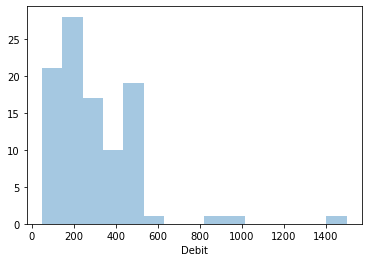

In [28]:
sb.distplot(cards.Debit, kde=False)

<AxesSubplot:xlabel='Value Date'>

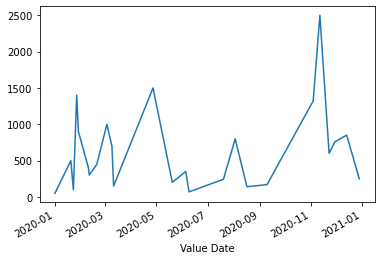

In [122]:
import matplotlib.pyplot as plt
time_series=pd.to_datetime(cards.index)

df=pd.DataFrame(cards.Debit, index=time_series)
df=df.groupby(df.index)["Debit"].transform("sum").drop_duplicates()
df.plot()


In [1]:
df=df.groupby(df.index)["Debit"].transform("sum").drop_duplicates()

NameError: name 'df' is not defined